<div style="text-align: center;">

<h1>Overview and Comparison: Asset Purchase Programmes - Pandemic Emergency Purchase Programmes </h1>

</div>

## Summary of the last 10 years of QE policy
- **What were the largest operations and when did they occur?**
- **How many total assets were purchase?**
- **What types of assets were purchased? Were they short term or long term assets?**

The ECB's Quantitative Easing (QE) policy officially began in October 2014 after previous efforts at setting short-term key interests rates fell short of stabilizing the European macroeconomy, although some pseudo/proto-QE policy had been conducted prior to 2014.

Currently, there are two ongoing QE programmes by the ECB:

- The first, known as the **Asset Purchase Programmes, or *APP*** for short, the progamme aims to support monetary policy and maintain price stability by injecting liquidity into the market and by raising asset prices. It is the main QE program run by the ECB and have been run since early 2015.
    - Transactions have been ongoing since March 2015. The largest purchases occurred from 2014 to 2017, with the largest purchases occuring from **April 2016 to March 2017** with **€80 billion in net purchases**. However, there was a slight increase from March 2020 to May 2022, including a temporary €120 billion envelope of net asset purchases from March to December 2020.
    - As of July 2022, the ECB has discontinued net asset purchases though it continued to invest the maturing principal payments from purchased securities until July 2023 when they were also discontinued.

- The second, known as the **Pandemic Emergency Purchase Programmes, or *PEPP*** for short, is another nonstandard monetary policy programme which began in March 2020 in response to COVID-19. Net assets purchases continued until March 2022 when they were discontinued.
    - The largest purchases were from **April 2020 to June 2020**, with **€339.542 billion in total net purchases** (over 100 billion each month), though net purchases continued to be over 50 billion until January 2022.
    - Reinvestment of the maturing principal payments from purchased securities will continue until the end of 2024 when they plan to be discontinued. Portfolio sales are likely to be gradual continuing past 2024.

As of the end of April 2024, the ECB's total (QE) holdings:
- ECB AAP held **€2,897.111 billion**
- ECB PEPP held **€1,662.164 billion**

The highest total holdings of the ECB was in June 2022, when
- ECB APP held **€3,265.144 billion**
- ECB PEPP held **€1,718.074 billion.**


In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [ ]:
# Import raw data
APP_raw = pd.read_csv('APP_history.csv')

In [ ]:
# Create clean data of ECB holdings
APP_d = APP_raw.copy()
APP_d.columns = APP_d.iloc[1]
APP_d.drop(labels=[0,1], axis=0, inplace=True)
APP_d = APP_d.iloc[:, np.r_[0:2, 10:14]]            # Mutliple slices
APP_d.drop(APP_d.tail(3).index, inplace=True)       # drop last n rows
#APP_d = APP_d.set_index(['Year', 'Month'])         # Set Mutli-index
APP_d.head(5)

1,Year,Month,Asset-backed securities purchase programme,Covered bond purchase programme 3,Corporate Sector purchase programme,Public sector purchase programme
2,2014,October,0,4768,0,0
3,2014,November,368,17801,0,0
4,2014,December,1744,29632,0,0
5,2015,January,2326,40255,0,0
6,2015,February,3463,51209,0,0


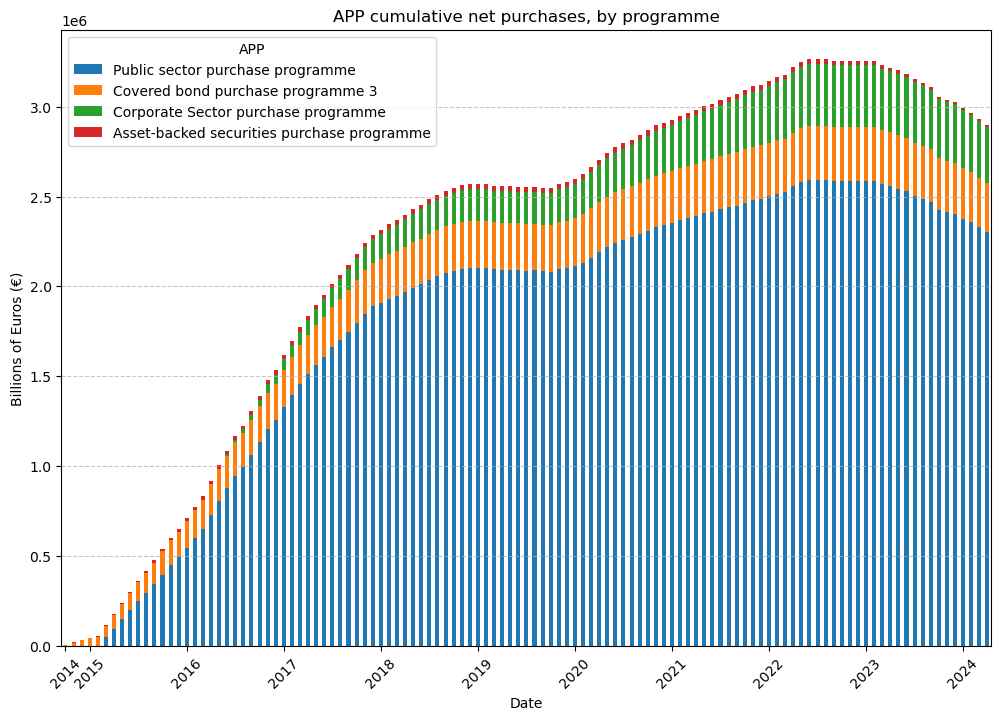

In [ ]:
### Create bar chart of data ###

# Intialize copy for replication
APP = APP_d.copy()

# Fix columns to numeric
asset_columns = APP.columns.difference(['Year', 'Month'])
APP[asset_columns] = APP[asset_columns].apply(pd.to_numeric, errors='coerce')

# Create a mapping of month names to numeric values
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Map the 'Month' column to numeric values
APP['Month_Num'] = APP['Month'].map(month_mapping)

# Create a 'Date' column by combining 'Year' and 'Month_Num'
APP['Date'] = pd.to_datetime(APP['Year'].astype(str) + '-' + APP['Month_Num'].astype(str) + '-01')

# Set the 'Date' column as the index
APP.set_index('Date', inplace=True)

# Drop the original 'Year', 'Month', and 'Month_Num' columns if they are no longer needed
APP.drop(columns=['Year', 'Month', 'Month_Num'], inplace=True)

# Reorder the columns to put the largest asset share at the bottom
# Calculate the total asset values for each date and reorder columns accordingly
APP = APP[APP.sum().sort_values(ascending=False).index]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
ax = APP.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

# Plot the stacked bar chart
#ax = APP.plot(kind='bar', stacked=True, figsize=(10, 7))

# Find the index positions of the first occurrence of each year
unique_years = APP.index.year.unique()
year_positions = [APP.index.get_loc(APP[APP.index.year == year].index[0]) for year in unique_years]

# Customize the legend to exclude the first value
handles, labels = ax.get_legend_handles_labels()
ax.legend(title='APP')

# Customize the x-axis to display years at the correct positions
ax.set_xticks(year_positions)
ax.set_xticklabels(unique_years, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Billions of Euros (€)')
plt.title('APP cumulative net purchases, by programme')

# Show the plot
plt.show()

In [ ]:
# Import raw data
PEPP_raw = pd.read_csv('PEPP_history.csv')
#APP = APP.reset_index()
#PEPP_raw

In [ ]:
# Create clean data of ECB holdings
PEPP_d = PEPP_raw.copy()
PEPP_d.columns = PEPP_d.iloc[1]
PEPP_d.drop(labels=[0,1], axis=0, inplace=True)
PEPP_d = PEPP_d.iloc[:, np.r_[0:2, 13:18]]            # Mutliple slices
PEPP_d.drop(PEPP_d.tail(3).index, inplace=True)       # drop last n rows
#PEPP_d = PEPP_d.set_index(['Year', 'Month'])          # Set Mutli-index
PEPP_d.head(5)

1,Year,Month,Asset Backed Securities,Covered Bonds,Corporate Bonds,Commercial Paper,Public Sector Securities
2,2020,Mar-May,0,2099,10579,35384,186603
3,2020,Jun-Jul,0,3128,17621,34845,384464
4,2020,Aug-Sep,0,3123,20318,32088,510112
5,2020,Oct-Nov,0,3123,20760,24306,650272
6,2021,Dec-Jan,0,3120,22315,16611,764710


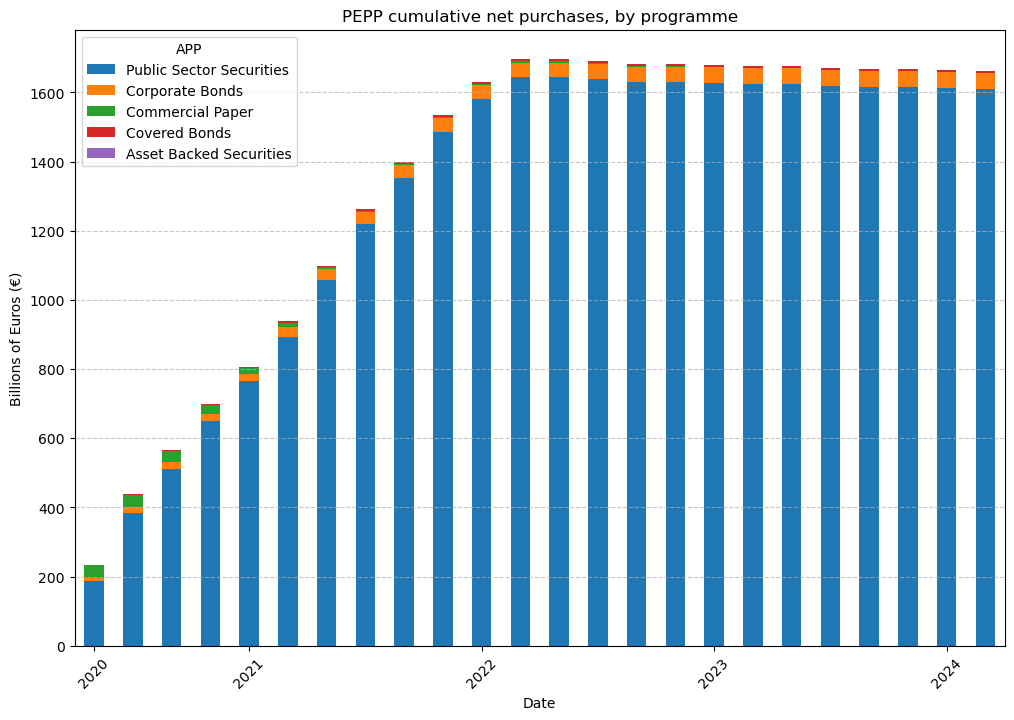

In [ ]:
### Create bar chart of PEPP data ###

# Intialize copy for replication
PEPP = PEPP_d.copy()
PEPP.drop(columns=["Month"], inplace = True)  # drop mixed month column

# Ensure the asset columns are numeric
asset_columns = PEPP.columns.difference(['Year'])
PEPP[asset_columns] = PEPP[asset_columns].apply(pd.to_numeric, errors='coerce')

# Group observations by 'Year' and assign a sequence of numbers for each year
PEPP['Month_Num'] = PEPP.groupby('Year').cumcount() + 1
# This creates an artificial month counter

# Create a 'Date' column by combining 'Year' and 'Month'
PEPP['Date'] = pd.to_datetime(PEPP['Year'].astype(str) + '-' + PEPP['Month_Num'].astype(str) + '-01')

# Set the 'Date' column as the index
PEPP.set_index('Date', inplace=True)

# Drop the original 'Year', 'Month', and 'Month_Num' columns if they are no longer needed
PEPP.drop(columns=['Year','Month_Num'], inplace=True)

# Reorder the columns to put the largest asset share at the bottom
# Calculate the total asset values for each date and reorder columns accordingly
PEPP = PEPP[PEPP.sum().sort_values(ascending=False).index]

# Plot the stacked bar chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
ax = PEPP.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

# Find the index positions of the first occurrence of each year
unique_years = PEPP.index.year.unique()
year_positions = [PEPP.index.get_loc(PEPP[PEPP.index.year == year].index[0]) for year in unique_years]

# Customize the legend to exclude the first value
handles, labels = ax.get_legend_handles_labels()
ax.legend(title='APP')

# Customize the x-axis to display years at the correct positions
ax.set_xticks(year_positions)
ax.set_xticklabels(unique_years, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Billions of Euros (€)')
plt.title('PEPP cumulative net purchases, by programme')

# Define a custom formatter function to format y-axis labels in billions of dollars
def billions_formatter(x, pos):
    return f'{x / 1e3:.0f}'

# # Change the scale of the y-axis (e.g., to logarithmic scale)
# plt.yscale('linear')

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Show the plot
plt.show()

Although some minor purchases were medium term assets, the overwhelming majority of purchases were **long-term assets**. For those which it applies, this includes primary and secondary markets.

The **ECB APP** consists of 4 types of purchase programmes:

***Corporate sector purchase programme (CSPP):***
- This programme consists of corporate sector bonds: these are bonds that
- Originally, purchases under the CSPP was limited to commercial paper with a maturity of 6 months, but during COVID-19 the restrictions were relaxed to a maturity of at least 28 days.
- As of May 2024, CSPP holdings were €310.110 billion.
    
***Public sector purchase programme (PSPP):***
- This programme consists of public sector securities.
    - It includes, nominal and inflation-linked central government bonds.
    - It also includes bonds issued by recognised agencies, regional and local governments, international organisations and multilateral development banks located in the euro area.
- As of May 2024, PSPP holdings were €2,287.308 billion.

***Asset-back securities purchase programme (ABSPP):***
- This programme consists of asset-backed securities.
- As of May 2024, ABSPP holdings were €9.571 billion.

***Third covered bond purchase programme (CBPP3):***
- This programme consists of covered bonds.
- As of May 2024, CBPP3 holdings were €269,783.

***Note: End-of-period book value at amortised cost.***

--------------------------------------------------------
The **ECB PEPP** consists of the same 4 types of purchase programmes as the APP and an additional asset category.

***Corporate sector purchase programme (CSPP):***
- As of March 2024, current holdings are €45.846 billion.

***Public sector purchase programme (PSPP):***
- In contrast to the APP, purchases for the public sector securities under the PEPP range from a a maturity of at least 70 days to 30 years and 364 days.
- As of March 2024, current holdings are €1,610.284 billion.

***Asset-back securities purchase programme (ABSPP):***
- Current holdings are €0.

***Covered bond purchase programme (CBPP):***
- As of March 2024, current holdings are €6.033 billion.

***PEPP Commercial Papers***
- Under the PEPP, commercial papers could be purchased independently of the CSPP. Commercial paper continued to be purchased under the CSPP as well.
- As of March 2024, current holdings are €0.

***Note: End-of-period book value at amortised cost.***

**Sources:**

1. APP Explainer: https://www.ecb.europa.eu/ecb-and-you/explainers/tell-me-more/html/app.en.html
2. APP Breakdown and Data: https://www.ecb.europa.eu/mopo/implement/app/html/index.en.html
3. PEPP Breakdown and Data: https://www.ecb.europa.eu/mopo/implement/pepp/html/index.en.html